In [1]:
import yfinance as yf
import riskfolio as rf
import pandas as pd
import seaborn as sns
import numpy as np
import streamlit as slt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [43]:
tickers = ["O","RTX","AXP","BX","nvda","MO"]

years_delta = 1
end_date = datetime.today()
start_date = end_date - timedelta(days =  years_delta * 365)

In [44]:
adj_close_df = pd.DataFrame()

for scrip in tickers:
    data = yf.download(scrip, start = start_date, end = end_date)
    adj_close_df[scrip] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [45]:
adj_close_df.head()

,O,RTX,AXP,BX,nvda,MO
Date,,,,,,
2023-11-13,47.391216,79.985390,152.912338,95.290260,48.605293,36.685177
2023-11-14,49.518597,78.678795,155.458572,100.028923,49.640980,36.886951
2023-11-15,49.832005,78.620277,157.955246,101.676743,48.873215,37.373024
2023-11-16,50.420830,78.806915,157.578781,101.111214,49.465038,37.327171
2023-11-17,50.249882,78.266670,161.056320,102.339760,49.283092,37.437225


In [46]:
change_df = adj_close_df.pct_change().dropna()
change_df

,O,RTX,AXP,BX,nvda,MO
Date,,,,,,
2023-11-14,0.044890,-0.016335,0.016652,0.049729,0.021308,0.005500
2023-11-15,0.006329,-0.000744,0.016060,0.016473,-0.015466,0.013177
2023-11-16,0.011816,0.002374,-0.002383,-0.005562,0.012109,-0.001227
2023-11-17,-0.003390,-0.006855,0.022069,0.012150,-0.003678,0.002948
2023-11-20,0.005859,-0.006401,0.007935,0.014196,0.022536,0.000490
...,...,...,...,...,...,...
2024-11-06,-0.030942,0.021936,0.069653,0.039854,0.040740,0.001845
2024-11-07,-0.010877,-0.012419,-0.028256,-0.000454,0.022457,-0.013815
2024-11-08,0.020043,0.028897,0.002719,0.006580,-0.008396,0.009526


In [47]:
description = change_df.describe()
description

,O,RTX,AXP,BX,nvda,MO
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000821,0.001786,0.002661,0.002723,0.004982,0.001647
std,0.011447,0.011046,0.015079,0.018627,0.032657,0.011227
min,-0.041192,-0.034561,-0.065948,-0.046153,-0.100046,-0.033679
25%,-0.005522,-0.004803,-0.004681,-0.009511,-0.015666,-0.003352
50%,0.000953,0.000992,0.002218,0.002482,0.005195,0.001647
75%,0.007250,0.006854,0.011012,0.015470,0.023758,0.006990
max,0.044890,0.082419,0.071037,0.072818,0.164009,0.078416


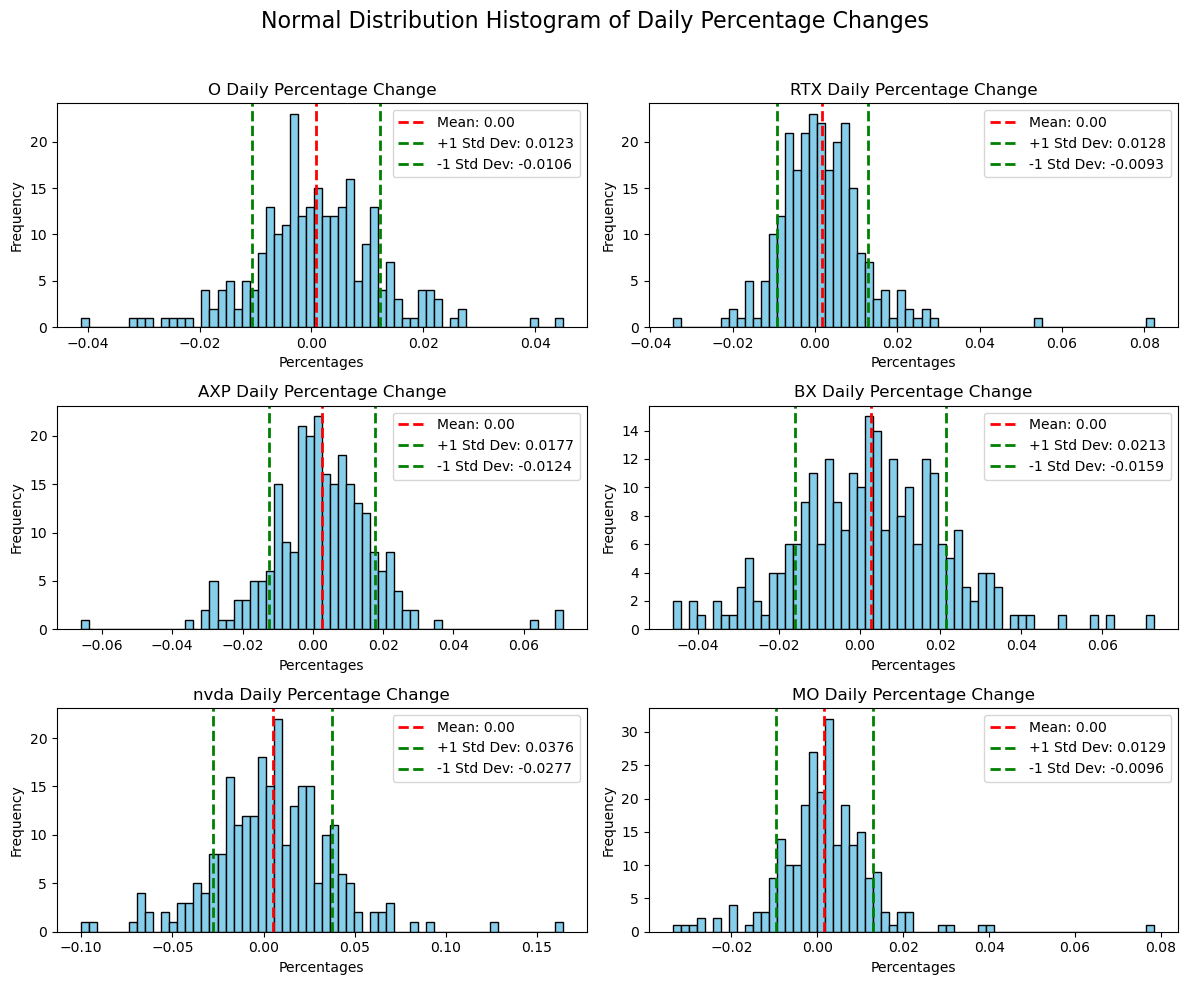

In [50]:
# Plot histograms for each stock's normalized percentage changes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Normal Distribution Histogram of Daily Percentage Changes", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column's histogram and add lines for mean and standard deviations
for i, column in enumerate(change_df.columns):
    # Plot the histogram
    axes[i].hist(change_df[column], bins=60, color='skyblue', edgecolor='black')
    
    # Calculate mean and standard deviation
    mean = change_df[column].mean()
    std_dev = change_df[column].std()
    
    # Plot the mean line
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean:.2f}")
    
    # Plot the standard deviation lines
    axes[i].axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label=f"+1 Std Dev: {(mean + std_dev):.4f}")
    axes[i].axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2, label=f"-1 Std Dev: {(mean - std_dev):.4f}")
    
    # Set titles and labels
    axes[i].set_title(f"{column} Daily Percentage Change")
    axes[i].set_xlabel("Percentages")
    axes[i].set_ylabel("Frequency")
    axes[i].legend(loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

<Axes: xlabel='Date'>

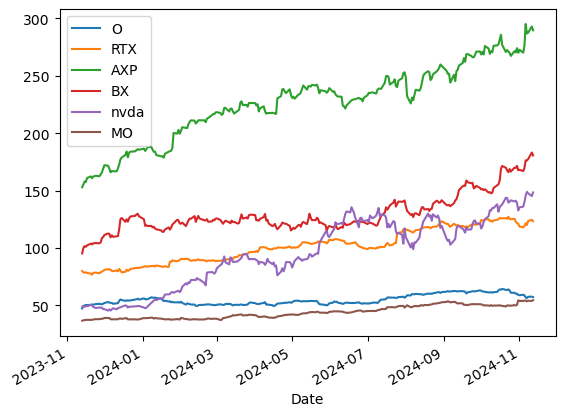

In [49]:
adj_close_df.plot()